In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


In [22]:
df=load_breast_cancer()
X=pd.DataFrame(df.data)
y=df.target
lasso_regression=Lasso()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [24]:
parameters={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90]}
lasso_cv=GridSearchCV(lasso_regression, parameters, scoring="neg_mean_squared_error", cv=5)
lasso_cv.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 10, 20, 30, 40, 50,
                                   60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [33]:
lasso_pred=lasso_cv.predict(X_test)
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)
score=r2_score(lasso_pred, y_test)
score

{'alpha': 8}
-0.09424946706336641


0.2774209386003732

<Axes: ylabel='Count'>

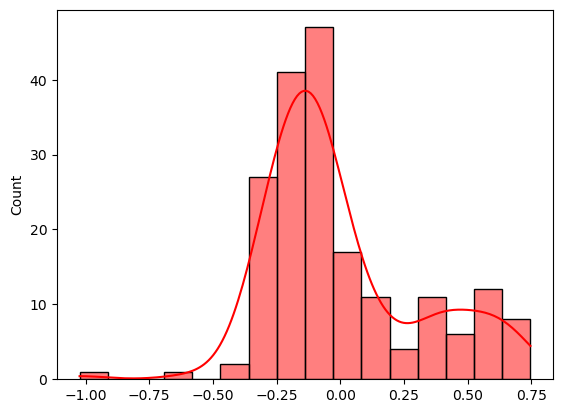

In [ ]:

sns.histplot(lasso_pred-y_test, color='red', kde=True)


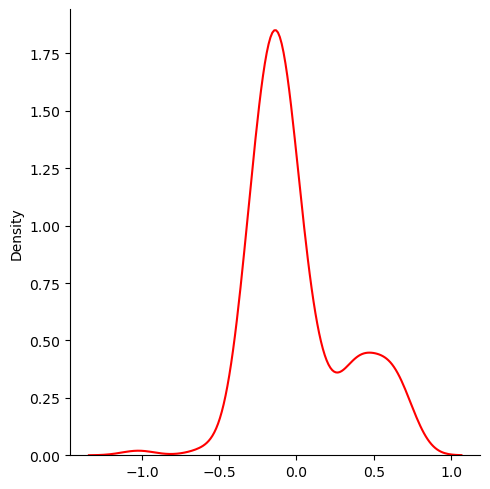

In [32]:
sns.displot(lasso_pred- y_test, kind='kde', color='red')